# **Biomarker Selection for PE, SLE, HPT, and HPTh**

This notebook performs feature selection to identify significant biomarkers for Preeclampsia (PE), Systemic Lupus Erythematosus (SLE), Hypertension (HPT), and Hypothyroidism (HPTh) using a merged gene expression dataset. Three feature selection methods—Lasso, Random Forest, and SVM-RFE—are applied to rank and select biomarkers. The intersection of selected features is identified, and a t-test is used to verify the statistical significance of the common biomarkers. The results are saved for further analysis.

### **1. Import Libraries**

The following libraries are imported for data manipulation, visualization, statistical testing, and machine learning-based feature selection.

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

### **2. Load Dataset**

The merged dataset containing gene expression data for PE, SLE, HPT and HPTh is loaded from a CSV file.

In [9]:
# Load the dataset
data = pd.read_csv('clean_data/merged_pe_sle_hpt_hpth_data.csv')
data.head()

,TFRC,AKT1,PTPRC,label
0,24789.0,1309.0,76.0,1
1,11953.0,1648.0,100.0,1
2,11993.0,1309.0,64.0,1
3,7821.0,1816.0,73.0,1
4,6527.0,2542.0,49.0,1


### **3. Select Features and Target**

The dataset is split into features (X: gene expression values) and the target variable (y: labels indicating disease status).

In [10]:
# Select features and target variable (X, y)
X = data.drop(columns=['label'])
y = data['label']

# Print the shape of the dataset
print(f"Shape of the dataset: {X.shape}, {y.shape}")

Shape of the dataset: (199, 3), (199,)


### **4. Standardize Features**

Features are standardized using StandardScaler to ensure comparability, as many ML algorithms (e.g., SVM) are sensitive to feature scales.

In [11]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
# Make a dataframe from the scaled features
X = pd.DataFrame(X, columns=data.columns[:-1])

### **5. Visualize Class Distribution**

A count plot visualizes the distribution of classes (e.g., healthy, T2D, CLL) in the dataset.

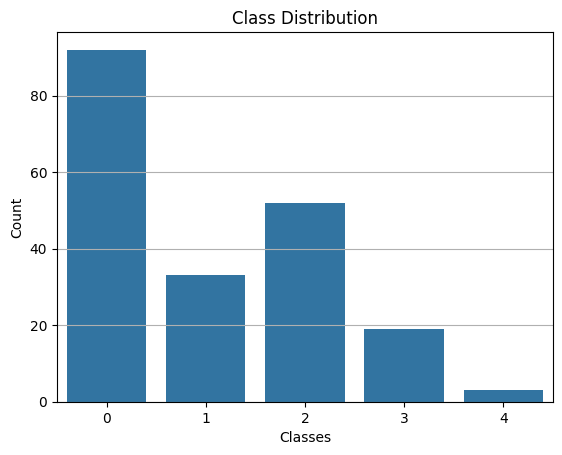

In [13]:
# Visualize the class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

### **6. Handle Class Imbalance (Commented Out)**

The code for handling class imbalance using SMOTE is present but commented out. It would upsample the minority class and visualize the new class distribution.

Resampled dataset shape: (460, 3), (460,)


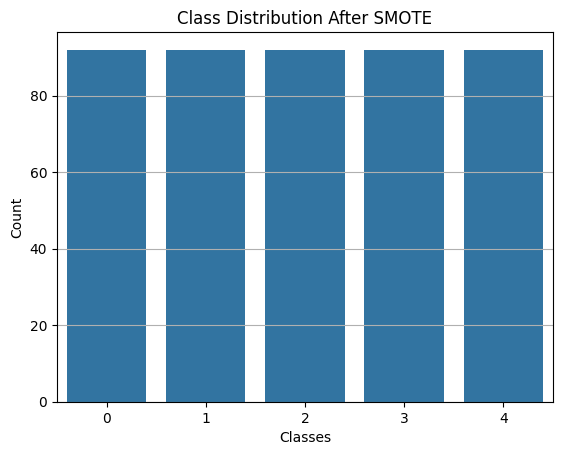

In [14]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X, y = smote.fit_resample(X, y)
# print the shapesbefore and after SMOTE
print(f"Resampled dataset shape: {X.shape}, {y.shape}")
# Visualize the class distribution after SMOTE
sns.countplot(x=y)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

### **7. Lasso Feature Selection**

A Lasso model is trained to select features by shrinking less important feature coefficients to zero. The absolute values of the coefficients are used to rank features.

In [15]:
# Train Lasso model and perform feature selection s
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
importance = np.abs(lasso.coef_)
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.reset_index(drop=True, inplace=True)
lasso_feature_importance = feature_importance[feature_importance['Importance'] > 0]
# Print the selected features
print("Number of Biomarkers selected by Lasso:", len(lasso_feature_importance))
print("Selected Biomarkers using Lasso:")
print(lasso_feature_importance)

Number of Biomarkers selected by Lasso: 3
Selected Biomarkers using Lasso:
  Feature  Importance
0    AKT1    0.632983
1    TFRC    0.559037
2   PTPRC    0.532581


### **8. Random Forest Feature Selection**

A Random Forest model is trained to select features based on their importance scores, derived from their contribution to classification.

In [16]:
# Train Random Forest model and perform feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importance = rf.feature_importances_
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.reset_index(drop=True, inplace=True)
rf_feature_importance = feature_importance[feature_importance['Importance'] > 0]
# Print the selected features
print("Number of Biomarkers selected by Random Forest:", len(rf_feature_importance))
print("Selected Biomarkers using Random Forest:")
print(rf_feature_importance)

Number of Biomarkers selected by Random Forest: 3
Selected Biomarkers using Random Forest:
  Feature  Importance
0    AKT1    0.374129
1   PTPRC    0.348080
2    TFRC    0.277791


### **9. SVM-RFE Feature Selection**

SVM-RFE is used to select the top 10 features by iteratively eliminating the least important features based on SVM weights.

In [17]:
# Train SVM-RFE model and perform feature selection
svm = SVC(kernel='linear', random_state=42)
rfe = RFE(estimator=svm, n_features_to_select=10)
rfe.fit(X, y)
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rfe.ranking_})
# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.reset_index(drop=True, inplace=True)
svmrfe_feature_importance = feature_importance[feature_importance['Importance'] > 0.0]
# Print the selected features
print("Number of Biomarkers selected by SVM-RFE:", len(svmrfe_feature_importance))
print("Selected Biomarkers using SVM-RFE:")
print(svmrfe_feature_importance)

Number of Biomarkers selected by SVM-RFE: 3
Selected Biomarkers using SVM-RFE:
  Feature  Importance
0    TFRC           1
1    AKT1           1
2   PTPRC           1


/home/sajid/anaconda3/envs/dsenv/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=3. There will be no feature selection and all features will be kept.
  warnings.warn(


### **10. Intersection of Selected Features**

The common biomarkers selected by all three methods (Lasso, Random Forest, and SVM-RFE) are identified.

In [18]:
# Intersection of selected features from all three methods
lasso_features = set(lasso_feature_importance['Feature'])
rf_features = set(rf_feature_importance['Feature'])
svmrfe_features = set(svmrfe_feature_importance['Feature'])
intersection_features = lasso_features.intersection(rf_features).intersection(svmrfe_features)
# Print the intersection of selected features
print("Number of Biomarkers in intersection:", len(list(intersection_features)))
print("Intersection of Selected Biomarkers:")
print(intersection_features)

Number of Biomarkers in intersection: 3
Intersection of Selected Biomarkers:
{'TFRC', 'AKT1', 'PTPRC'}


### **11. Compile Selected Features with Scores**

A DataFrame is created to compile the importance scores from all three methods for the common biomarkers.



In [19]:
# Create a new DataFrame with the selected features with scores from all three methods
# Create a list to store rows
rows = []
for feature in intersection_features:
    lasso_score = lasso_feature_importance[lasso_feature_importance['Feature'] == feature]['Importance'].values[0]
    rf_score = rf_feature_importance[rf_feature_importance['Feature'] == feature]['Importance'].values[0]
    svmrfe_score = svmrfe_feature_importance[svmrfe_feature_importance['Feature'] == feature]['Importance'].values[0]
    rows.append({
        'Feature': feature,
        'Lasso': lasso_score,
        'Random Forest': rf_score,
        'SVM-RFE': svmrfe_score
    })

selected_features = pd.DataFrame(rows)
# Print the selected features with scores
print("Selected Biomarkers with Scores:")
print(selected_features)
# Save to CSV
selected_features.to_csv('results/pe_sle_hpt_hpth_multimode_selected_features.csv', index=False)

Selected Biomarkers with Scores:
  Feature     Lasso  Random Forest  SVM-RFE
0    TFRC  0.559037       0.277791        1
1    AKT1  0.632983       0.374129        1
2   PTPRC  0.532581       0.348080        1


### **12. Verify Common Biomarkers with T-test**

A t-test is performed to verify the statistical significance of the common biomarkers by comparing their expression levels between healthy (label 0) and T2D (label 1) groups.

In [20]:
# Verify the common biomarkers with t-test
# Load the dataset again
data = pd.read_csv('clean_data/merged_pe_sle_hpt_hpth_data.csv')
# Select features and target variable (X, y)
X = data.drop(columns=['label'])
y = data['label']
# Select the common biomarkers
common_biomarkers = list(intersection_features)
# Create a new DataFrame with the common biomarkers
common_biomarkers_df = data[common_biomarkers]
# Add the target variable
common_biomarkers_df['label'] = y
# Perform t-test for each common biomarker
t_test_results = []
for feature in common_biomarkers:
    group1 = common_biomarkers_df[common_biomarkers_df['label'] == 0][feature]
    group2 = common_biomarkers_df[common_biomarkers_df['label'] == 1][feature]
    t_stat, p_value = ttest_ind(group1, group2)
    t_test_results.append({
        'Feature': feature,
        't-statistic': t_stat,
        'p-value': p_value
    })
# Create a DataFrame for t-test results
t_test_results_df = pd.DataFrame(t_test_results)
# Print the t-test results
print("T-test Results:")
print(t_test_results_df.sort_values(by='p-value', ascending=True).reset_index(drop=True))
# Save t-test results to CSV
t_test_results_df.to_csv('results/pe_sle_hpt_hpth_multimode_t_test_results.csv', index=False)


T-test Results:
  Feature  t-statistic   p-value
0    AKT1    -4.256624  0.000041
1   PTPRC     1.526027  0.129570
2    TFRC     0.681182  0.497037


In [21]:
# print the genes with p-value < 0.05
significant_genes = t_test_results_df[t_test_results_df['p-value'] < 0.05].sort_values(by='p-value', ascending=True).reset_index(drop=True)
print("Significant Genes:")
print(significant_genes)
# Save significant genes to CSV
significant_genes.to_csv('results/pe_sle_hpt_hpth_multimode_significant_genes.csv', index=False)

Significant Genes:
  Feature  t-statistic   p-value
0    AKT1    -4.256624  0.000041
